**STEP 1: DOWNLOAD DATASET**

**STEP 2: LOAD DATASET**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("/Mall_Customers.csv")

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
data.size

1000

**STEP 3: PERFORM VISUALIZATION**

**UNIVARIATE VISUALIZATION**

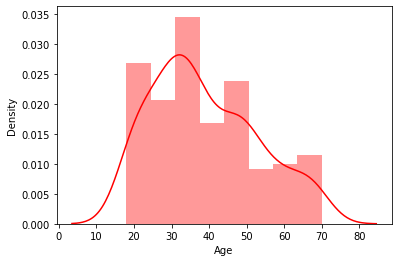

In [ ]:
sns.distplot(data['Age'],color='red')

**BI-VARIATE ANALYSIS**

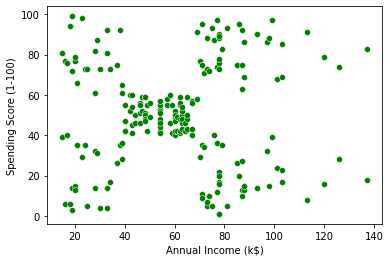

In [ ]:
sns.scatterplot(data['Annual Income (k$)'],data['Spending Score (1-100)'],color='GREEN')

**MULTI VARIATE ANALYSIS**

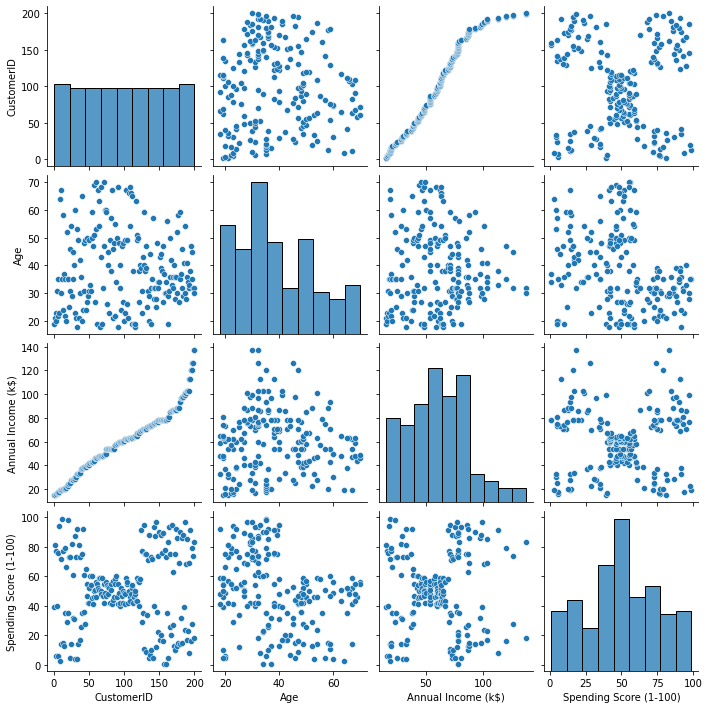

In [ ]:
sns.pairplot(data)

**STEP 4:Perform Descreptive Statistics On The Dataset**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
data.mean()

CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

In [ ]:
data.median()

CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

In [ ]:
data.mode()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Female,32.0,54.0,42.0
1,2,NaN,NaN,78.0,NaN
2,3,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...
195,196,NaN,NaN,NaN,NaN
196,197,NaN,NaN,NaN,NaN
197,198,NaN,NaN,NaN,NaN
198,199,NaN,NaN,NaN,NaN


In [ ]:
data.skew()

CustomerID                0.000000
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

In [ ]:
data.kurt()

CustomerID               -1.200000
Age                      -0.671573
Annual Income (k$)       -0.098487
Spending Score (1-100)   -0.826629
dtype: float64

In [ ]:
data.var()

CustomerID                3350.000000
Age                        195.133166
Annual Income (k$)         689.835578
Spending Score (1-100)     666.854271
dtype: float64

In [ ]:
data.std()

CustomerID                57.879185
Age                       13.969007
Annual Income (k$)        26.264721
Spending Score (1-100)    25.823522
dtype: float64

In [ ]:
data.min()

CustomerID                     1
Gender                    Female
Age                           18
Annual Income (k$)            15
Spending Score (1-100)         1
dtype: object

In [ ]:
data.max()

CustomerID                 200
Gender                    Male
Age                         70
Annual Income (k$)         137
Spending Score (1-100)      99
dtype: object

In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Step 5. Checking for Missing Values and Deal with them**

In [ ]:
data.isna().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [ ]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**Step 6. Find the Outliers and Replace the Outliers**

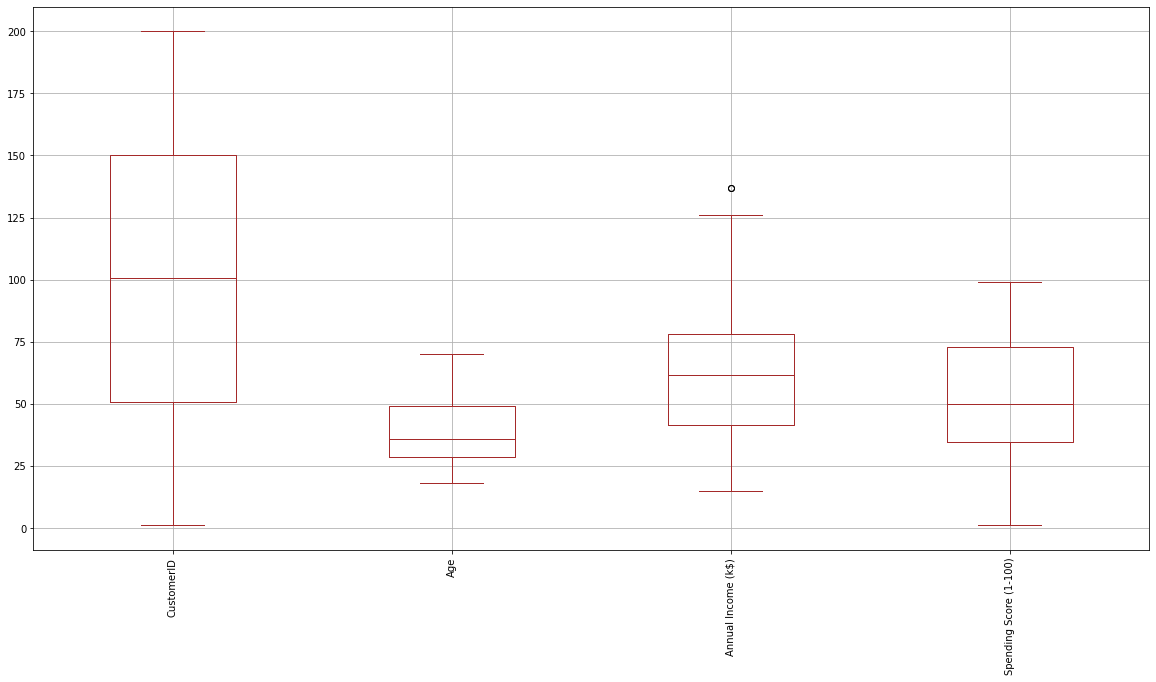

In [ ]:
data.boxplot( rot = 90, figsize=(20,10),color='brown')

**Outlier in Annual income**

In [ ]:
Q3 = data['Annual Income (k$)'].quantile(0.99)
Q1 = data['Annual Income (k$)'].quantile(0.01)
data['Annual Income (k$)'][data['Annual Income (k$)']<=Q1]=Q1
data['Annual Income (k$)'][data['Annual Income (k$)']>=Q3]=Q3

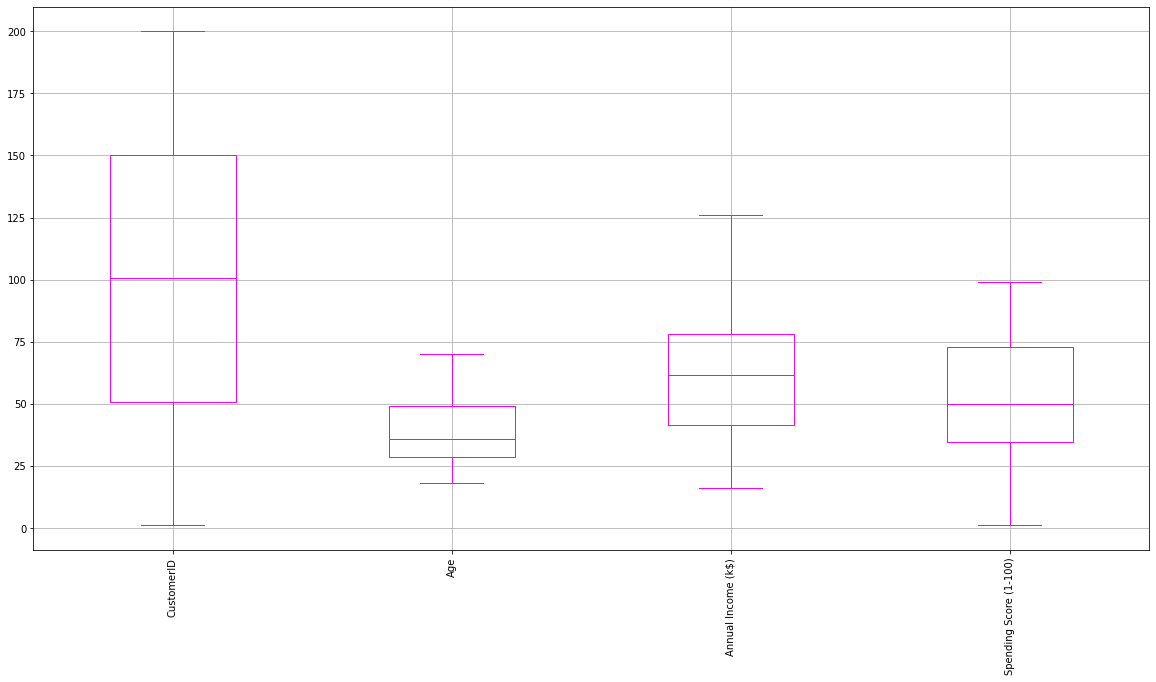

In [ ]:
data.boxplot( rot = 90, figsize=(20,10),color='magenta')

**Step 7. Check for Categorical Columns and Perform Encoding**

In [ ]:
data.select_dtypes(include='object').columns

Index(['Gender'], dtype='object')

In [ ]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
data['Gender'].replace({'Male':1,'Female':0},inplace=True)

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15.99,39
1,2,1,21,15.99,81
2,3,0,20,16.00,6
3,4,0,23,16.00,77
4,5,0,31,17.00,40


**Step 8. Scaling the Data**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
x_scaled = pd.DataFrame(scale.fit_transform(data),columns= data.columns)
x_scaled.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,1.0,0.019231,0.000000,0.387755
1,0.005025,1.0,0.057692,0.000000,0.816327
2,0.010050,0.0,0.038462,0.000091,0.051020
3,0.015075,0.0,0.096154,0.000091,0.775510
4,0.020101,0.0,0.250000,0.009172,0.397959


**Step 9. Perform any of the Clustering Algorithms**

In [ ]:
from sklearn.cluster import KMeans
error = []
k = list(range(2,9))

for i in k:
  kmeans = KMeans(n_clusters = i , init = 'k-means++')
  kmeans.fit(data)
  error.append(kmeans.inertia_)
error

[384779.8881911789,
 269460.0633185416,
 193398.3645503846,
 155189.90449816087,
 120688.62276875935,
 101510.6432346269,
 84663.08490522244]

Text(0, 0.5, 'error')

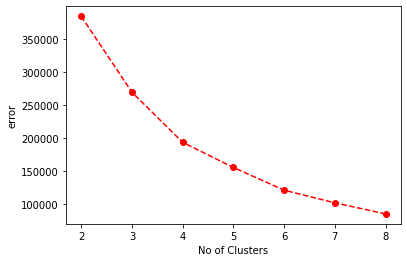

In [ ]:
plt.plot(k,error, 'ro--')
plt.xlabel('No of Clusters')
plt.ylabel('error')

In [ ]:
model = KMeans(n_clusters = 4)
model.fit(data)

KMeans(n_clusters=4)

In [ ]:
mb=pd.Series(model.labels_)
data.head(3)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15.99,39
1,2,1,21,15.99,81
2,3,0,20,16.00,6


**Step 10. Add the Cluster data with the Primary Dataset**

In [ ]:
data['Cluster']=kmeans.labels_
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15.99,39,0
1,2,1,21,15.99,81,4
2,3,0,20,16.00,6,0
3,4,0,23,16.00,77,4
4,5,0,31,17.00,40,0


In [ ]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
195,196,0,35,120.00,79,3
196,197,0,45,126.00,28,7
197,198,1,32,126.00,74,3
198,199,1,32,126.11,18,7
199,200,1,30,126.11,83,3


**Step 11. Split the Data into Dependent and Independent Variables**

In [ ]:
X=data.drop('Cluster',axis=1)
y=data['Cluster']
y

0      0
1      4
2      0
3      4
4      0
      ..
195    3
196    7
197    3
198    7
199    3
Name: Cluster, Length: 200, dtype: int32

**Step 12. Split the Data into Training and Testing**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(160, 5)
(160,)
(40, 5)
(40,)


In [ ]:
X_train

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
79,80,0,49,54.0,42
197,198,1,32,126.0,74
38,39,0,36,37.0,26
24,25,0,54,28.0,14
122,123,0,40,69.0,58
...,...,...,...,...,...
106,107,0,66,63.0,50
14,15,1,37,20.0,13
92,93,1,48,60.0,49
179,180,1,35,93.0,90


In [ ]:
X_test

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
95,96,1,24,60.0,52
15,16,1,22,20.0,79
30,31,1,60,30.0,4
158,159,1,34,78.0,1
128,129,1,59,71.0,11
115,116,0,19,65.0,50
69,70,0,32,48.0,47
170,171,1,40,87.0,13
174,175,0,52,88.0,13
45,46,0,24,39.0,65


In [ ]:
y_train

79     2
197    3
38     0
24     0
122    6
      ..
106    6
14     0
92     6
179    3
102    6
Name: Cluster, Length: 160, dtype: int32

In [ ]:
y_test

95     6
15     4
30     0
158    1
128    1
115    6
69     2
170    7
174    7
45     4
66     2
182    7
165    5
78     6
186    7
177    3
56     2
152    1
82     2
68     2
124    1
16     0
148    1
93     6
65     2
60     2
84     6
67     2
125    5
132    1
9      4
18     0
55     2
75     2
150    1
104    6
135    5
137    5
164    7
76     2
Name: Cluster, dtype: int32

**Step 13. Build the Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

**Step 14. Train the Model**

In [ ]:
y_pred = log_reg.predict(X_train)
y_pred

array([6, 3, 2, 0, 6, 3, 4, 4, 5, 2, 3, 5, 4, 7, 6, 2, 1, 6, 1, 6, 3, 6,
       4, 0, 4, 6, 2, 3, 2, 1, 2, 5, 1, 4, 6, 3, 0, 5, 6, 3, 0, 6, 2, 3,
       3, 6, 5, 0, 7, 2, 0, 5, 6, 4, 4, 7, 5, 0, 4, 6, 0, 0, 7, 5, 6, 7,
       0, 2, 6, 1, 1, 0, 7, 5, 2, 5, 2, 2, 5, 0, 0, 6, 5, 1, 4, 4, 7, 5,
       6, 4, 7, 2, 6, 1, 2, 7, 4, 6, 2, 5, 7, 1, 3, 2, 2, 0, 4, 6, 6, 6,
       1, 3, 6, 0, 4, 2, 3, 5, 4, 2, 3, 7, 5, 3, 2, 2, 6, 2, 7, 2, 2, 6,
       4, 2, 1, 7, 5, 4, 5, 3, 4, 2, 5, 1, 5, 6, 6, 6, 6, 2, 6, 3, 0, 7,
       2, 6, 0, 6, 3, 6], dtype=int32)

In [ ]:
log_reg.score(X_train,y_train)

0.875

**Step 15. Test the Model**

In [ ]:
y_pred = log_reg.predict(X_test)
y_pred

array([6, 4, 0, 1, 1, 3, 2, 1, 1, 4, 2, 7, 5, 6, 7, 3, 2, 1, 6, 2, 7, 0,
       7, 6, 2, 2, 6, 2, 5, 7, 4, 0, 2, 2, 1, 6, 5, 5, 1, 2], dtype=int32)

In [ ]:
log_reg.score(X_test,y_test)

0.8

**Step 16. Measure the Performance using Evaluation Metrics**

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,y_pred)

0.8

In [ ]:
y_pred1 = log_reg.predict(X_train)

accuracy_score(y_train,y_pred1)

0.875

In [ ]:
y_pred=log_reg.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[ 3,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  4,  0,  0,  0,  0,  0,  3],
       [ 0,  0, 10,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  3,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  4,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  5,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  2]])

In [ ]:
pd.crosstab(y_test,y_pred)

col_0,0,1,2,3,4,5,6,7
Cluster,,,,,,,,
0,3,0,0,0,0,0,0,0
1,0,4,0,0,0,0,0,3
2,0,0,10,0,0,0,1,0
3,0,0,0,1,0,0,0,0
4,0,0,0,0,3,0,0,0
5,0,0,0,0,0,4,0,0
6,0,0,0,1,0,0,5,0
7,0,3,0,0,0,0,0,2


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.57      0.57      0.57         7
           2       1.00      0.91      0.95        11
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         4
           6       0.83      0.83      0.83         6
           7       0.40      0.40      0.40         5

    accuracy                           0.80        40
   macro avg       0.79      0.84      0.80        40
weighted avg       0.81      0.80      0.80        40

